Importing each of the datasets and taking a first look


1. Preparing and Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
%pip install fastcluster

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_player_data = pd.read_csv('hw_vis/player_data.csv')
df_players = pd.read_csv('hw_vis/Players.csv')
df_seasons_stats = pd.read_csv('hw_vis/Seasons_Stats.csv')

2. General information about datasets

In [4]:
df_player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In the df_player_data dataset, we can see that there are some columns with null (nan) values, such as position, height, and others. Only four columns have all rows filled (this is a better situation compared to the df_players and df_seasons_stats datasets) We have the following distribution by column type:  
categorical: name, position, college;  
ordinal: year_start, year_end, height, weight, birth_date;  
Notice that birth_date and height are of data type object.

In [5]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


Here the same situation. In this dataset, no column has all rows filled (non-null). We have the following distribution by column type:  
categorical: Player, collage, birth_city, birth_state;  
ordinal: height, weight, born;

In [6]:
df_seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

And finally, here is the same situation. Moreover, there are blanl and blank2 columns, which contain no information at all (contain nan). In this dataset, not a single column has all rows filled (non-null), this can lead to an incomplete picture during analysis due to lack of data. Here is a description of the distribution by type of some columns:  
categorical: Player, Pos, Tm;  
ordinal: Year, Age;  
Note that there is an Age column here, this information is redundant since it can be obtained from the birth_date column of the df_player_data dataframe.


Let's take a look at the first rows of the imported datasets and the dimensions of the datasets

In [7]:
df_player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
df_player_data.shape

(4550, 8)

We see that there are 8 columns in the table, which corresponds to the first line of the file: name, year_start, year_end, position, height, weight, birth_date, college Apparently, an error was made in the Columns.docx file, since there is still a player name column

In [9]:
df_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [10]:
df_players.shape

(3922, 8)

Here everything was imported correctly, but the "Unnamed: 0" column is apparently superfluous, since it does not carry useful information. We'll remove it later. The fields height, weight, born are redundant, you need to remove them from either df_player_data or df_players.

In [11]:
display(df_seasons_stats)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [12]:
df_seasons_stats.shape

(24691, 53)

3. Type conversion and value adjustment


In [13]:
cleared_df_seasons_stats = df_seasons_stats.copy()
cleared_df_seasons_stats[cleared_df_seasons_stats[:] == 0]

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
cleared_df_seasons_stats.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [15]:
cleared_df_seasons_stats[cleared_df_seasons_stats[:] == 0].count()

Unnamed: 0       1
Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS            5165
MP               5
PER             39
TS%            201
3PAr          3423
FTr            772
ORB%           858
DRB%           371
TRB%           254
AST%           754
STL%          1121
BLK%          2335
TOV%           450
USG%            58
blanl            0
OWS           2268
DWS           2357
WS            1959
WS/48           68
blank2           0
OBPM           317
DBPM           415
BPM            222
VORP          2761
FG             403
FGA             99
FG%            304
3P            7149
3PA           3511
3P%           3638
2P             452
2PA            128
2P%            324
eFG%           304
FT            1031
FTA            858
FT%            173
ORB            863
DRB            375
TRB            276
AST            800
STL           1126
BLK           2284
TOV            513
PF             295
PTS         

Note that the 'Unnamed: 0' column contains a single zero. Apparently - this is the value in the very first row of this column.


In [16]:
cleared_df_seasons_stats[:].isnull().all()

Unnamed: 0    False
Year          False
Player        False
Pos           False
Age           False
Tm            False
G             False
GS            False
MP            False
PER           False
TS%           False
3PAr          False
FTr           False
ORB%          False
DRB%          False
TRB%          False
AST%          False
STL%          False
BLK%          False
TOV%          False
USG%          False
blanl          True
OWS           False
DWS           False
WS            False
WS/48         False
blank2         True
OBPM          False
DBPM          False
BPM           False
VORP          False
FG            False
FGA           False
FG%           False
3P            False
3PA           False
3P%           False
2P            False
2PA           False
2P%           False
eFG%          False
FT            False
FTA           False
FT%           False
ORB           False
DRB           False
TRB           False
AST           False
STL           False
BLK           False


As you can see, the blanl and blank2 columns are empty, we can safely delete them since we will not lose information.

In [17]:
inf = cleared_df_seasons_stats[cleared_df_seasons_stats.isin([np.inf, -np.inf],)].count()
inf[inf != 0]

Series([], dtype: int64)

As we see np.inf, -np.inf there are no values ​​in the dataframe.


Let's check for the 'Unnamed: 0' field to make sure that this field contains only line numbers:


In [18]:
np.unique(np.where((np.arange(0, (len(cleared_df_seasons_stats))) == cleared_df_seasons_stats['Unnamed: 0']), True, False))

array([ True])

Yes, the 'Unnamed: 0' column only contains line numbering. You can safely remove it.


The data type of the Year column needs to be changed to int as it contains semicolons


Let's remove the empty values ​​from the Player column. If we do not know the player's name, then in this data analysis we will not need his game statistics, moreover, we will not even be able to determine which games belong to one particular player without his name. Delete empty columns and replace nan values ​​with 0 for more correct data processing.

In [19]:
cleared_df_seasons_stats = cleared_df_seasons_stats.dropna(subset = ['Player'])
cleared_df_seasons_stats["Player"] = cleared_df_seasons_stats["Player"].astype("string")
cleared_df_seasons_stats = cleared_df_seasons_stats.drop(columns=['Unnamed: 0', 'blanl', 'blank2'])
cleared_df_seasons_stats = cleared_df_seasons_stats.fillna(0)
cleared_df_seasons_stats['Year'] = cleared_df_seasons_stats['Year'].astype(int)

In [20]:
cleared_df_seasons_stats.isna().sum()

Year      0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [21]:
cleared_df_seasons_stats[cleared_df_seasons_stats[:] == 0].count()

Year          0
Player        0
Pos           0
Age           8
Tm            0
G             0
GS        11556
MP          491
PER         562
TS%         287
3PAr       9208
FTr         871
ORB%       4690
DRB%       4203
TRB%       3307
AST%       2823
STL%       4953
BLK%       6167
TOV%       5492
USG%       5042
OWS        2307
DWS        2396
WS         1998
WS/48       591
OBPM       4144
DBPM       4242
BPM        4049
VORP       6588
FG          403
FGA          99
FG%         403
3P        12846
3PA        9208
3P%       12846
2P          452
2PA         128
2P%         452
eFG%        403
FT         1031
FTA         858
FT%        1031
ORB        4690
DRB        4202
TRB         588
AST         800
STL        4953
BLK        6111
TOV        5492
PF          295
PTS         287
dtype: int64

Let's check, yes, all nan values ​​are gone, and there are more zero values.


4. Data Exploration and Graph Analysis


Find out the number of players in the cleared_df_seasons_stats dataset


In [22]:
game_count_by_player = cleared_df_seasons_stats['Player'].value_counts()
game_count_by_player.count()

3921

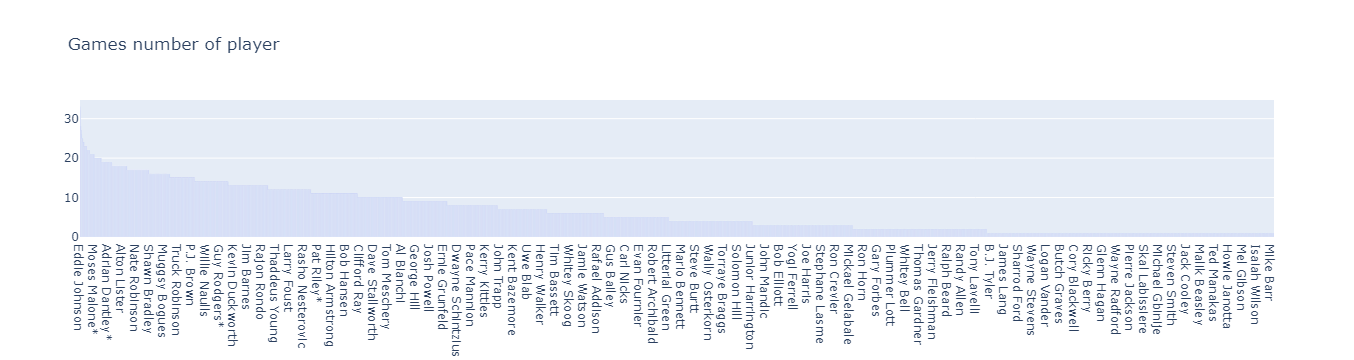

In [23]:
data = go.Bar(
    x = game_count_by_player.index,
    y = game_count_by_player,
    name = 'Count of games'
)

fig = go.Figure(data = data, layout = {'title': 'Games number of player'}, layout_xaxis_range = [0, game_count_by_player.count()])

iplot(fig, show_link=False)

This histogram shows a sorted list of players by the number of games (in descending order). In first place is Eddie Johnson with 33 games. The histogram itself shows the distributions for all the players in the dataframe, but not all player names fit on the x-axis. Details can be seen if you mouse over the histogram bars.


In [24]:
cleared_df_seasons_stats.groupby('Player')['Tm'].value_counts()

Player              Tm 
A.C. Green          LAL     9
                    PHO     4
                    DAL     3
                    MIA     1
                    TOT     1
                           ..
Zoran Dragic        PHO     1
                    TOT     1
Zoran Planinic      NJN     3
Zydrunas Ilgauskas  CLE    12
                    MIA     1
Name: Tm, Length: 12150, dtype: int64

As you can see, one player could be in different teams.


Take the 10 players with the most games


In [25]:
player_game_10 = game_count_by_player[np.arange(0,10)]

In [26]:
player_game_10.reset_index()

,index,Player
0,Eddie Johnson,33
1,Mike Dunleavy,32
2,Gerald Henderson,29
3,Nazr Mohammed,28
4,Kevin Willis,27
5,Joe Smith,26
6,George Johnson,26
7,Andre Miller,25
8,Juwan Howard,25
9,James Edwards,25


In [27]:
cleared_df_seasons_stats[['Player', 'Year', 'PER']]

,Player,Year,PER
0,Curly Armstrong,1950,0.0
1,Cliff Barker,1950,0.0
2,Leo Barnhorst,1950,0.0
3,Ed Bartels,1950,0.0
4,Ed Bartels,1950,0.0
...,...,...,...
24686,Cody Zeller,2017,16.7
24687,Tyler Zeller,2017,13.0
24688,Stephen Zimmerman,2017,7.3
24689,Paul Zipser,2017,6.9


Let's add data from the main dataset to the list of players from game_count_by_player


In [28]:
PER_player = cleared_df_seasons_stats[['Player', 'Year', 'PER']].set_index('Player').join(game_count_by_player[np.arange(0,10)], how='right')

In [29]:
PER_player.reset_index()

,index,Year,PER,Player
0,Andre Miller,2000,17.9,25
1,Andre Miller,2001,20.1,25
2,Andre Miller,2002,21.8,25
3,Andre Miller,2003,15.2,25
4,Andre Miller,2004,18.8,25
...,...,...,...,...
271,Nazr Mohammed,2012,11.0,28
272,Nazr Mohammed,2013,10.8,28
273,Nazr Mohammed,2014,10.1,28
274,Nazr Mohammed,2015,8.7,28


Check that the data is connected correctly


In [30]:
print(PER_player.index)
len(PER_player.index.unique())

Index(['Andre Miller', 'Andre Miller', 'Andre Miller', 'Andre Miller',
       'Andre Miller', 'Andre Miller', 'Andre Miller', 'Andre Miller',
       'Andre Miller', 'Andre Miller',
       ...
       'Nazr Mohammed', 'Nazr Mohammed', 'Nazr Mohammed', 'Nazr Mohammed',
       'Nazr Mohammed', 'Nazr Mohammed', 'Nazr Mohammed', 'Nazr Mohammed',
       'Nazr Mohammed', 'Nazr Mohammed'],
      dtype='string', length=276)


10

Yes, in the end we have 10 unique players with data


In [31]:
PER_player.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, Andre Miller to Nazr Mohammed
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    276 non-null    int32  
 1   PER     276 non-null    float64
 2   Player  276 non-null    Int64  
dtypes: Int64(1), float64(1), int32(1)
memory usage: 15.9 KB


In [32]:
PER_player.loc[PER_player.index == 'Gerald Henderson']

,Year,PER,Player
Gerald Henderson,1980,12.7,29
Gerald Henderson,1981,10.4,29
Gerald Henderson,1982,13.2,29
Gerald Henderson,1983,12.1,29
Gerald Henderson,1984,14.7,29
Gerald Henderson,1985,14.3,29
Gerald Henderson,1986,15.7,29
Gerald Henderson,1987,14.5,29
Gerald Henderson,1987,14.0,29
Gerald Henderson,1987,14.6,29


We have already found out that each player can have several games in a season. In addition to this, each player can have multiple Performance Ratings (PER) per season. For example, Gerald Henderson has two ratings for 1987: 14.5 and 14.0.


Let's take a look at the player's efficiency rating for all seasons. To do this, we will build a graph


In [33]:
PER_player = PER_player.reset_index().groupby('index')

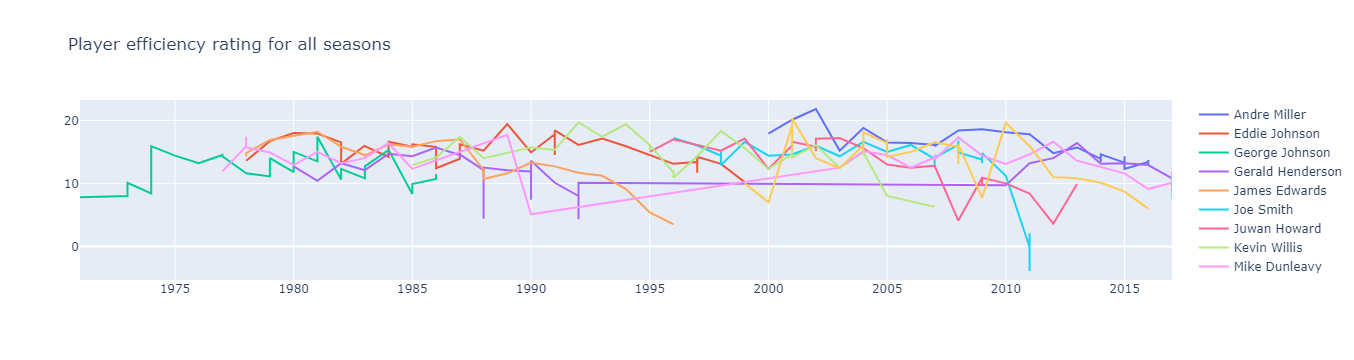

In [34]:
data2 = []
for player, group in PER_player:
    data2.append(go.Scatter(
        x = group['Year'],
        y = group['PER'],
        name = player
    ))

fig2 = go.Figure(data = data2, layout = {'title': 'Player efficiency rating for all seasons'})

iplot(fig2, show_link = False)

In [35]:
cleared_df_seasons_stats.groupby(['Year', 'Player'])['Player'].count().info()

<class 'pandas.core.series.Series'>
MultiIndex: 20286 entries, (1950, 'Al Cervi*') to (2017, 'Zaza Pachulia')
Series name: Player
Non-Null Count  Dtype
--------------  -----
20286 non-null  int64
dtypes: int64(1)
memory usage: 249.2+ KB


In [36]:
cleared_df_seasons_stats[['Year', 'Player', 'PTS']].set_index(['Year', 'Player'])

PTS
Year Player                  
1950 Curly Armstrong    458.0
     Cliff Barker       279.0
     Leo Barnhorst      438.0
     Ed Bartels          63.0
     Ed Bartels          59.0
...                       ...
2017 Cody Zeller        639.0
     Tyler Zeller       178.0
     Stephen Zimmerman   23.0
     Paul Zipser        240.0
     Ivica Zubac        284.0

[24624 rows x 1 columns]

Let's create a new feature Player_game_count_per_year:


In [37]:
featured_df_seasons_stats = pd.merge(
    cleared_df_seasons_stats[['Year', 'Player', 'PTS', 'PER']], 
    cleared_df_seasons_stats.groupby(['Year', 'Player'])['Player'].count(), 
    how='left', 
    left_on = ['Year', 'Player'], 
    right_index = True,
    suffixes=(None, '_game_count_per_year')
)

# featured_df_seasons_stats.loc[featured_df_seasons_stats['Player'] == 'Eddie Johnson']
# cleared_df_seasons_stats.groupby(['Year', 'Player'])['Player'].count()[1986.0, 'Eddie Johnson']


top_3_PER_players = featured_df_seasons_stats.groupby(['Player'])['PER'].sum().sort_values(ascending=False)[0:3]
print(top_3_PER_players)
featured_df_seasons_stats = featured_df_seasons_stats.loc[featured_df_seasons_stats['Player'].isin(top_3_PER_players.index.values)]
#featured_df_seasons_stats

Player
Shaquille O'Neal*    519.3
Eddie Johnson        501.6
Kevin Garnett        484.0
Name: PER, dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24660\1652458797.py:2: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



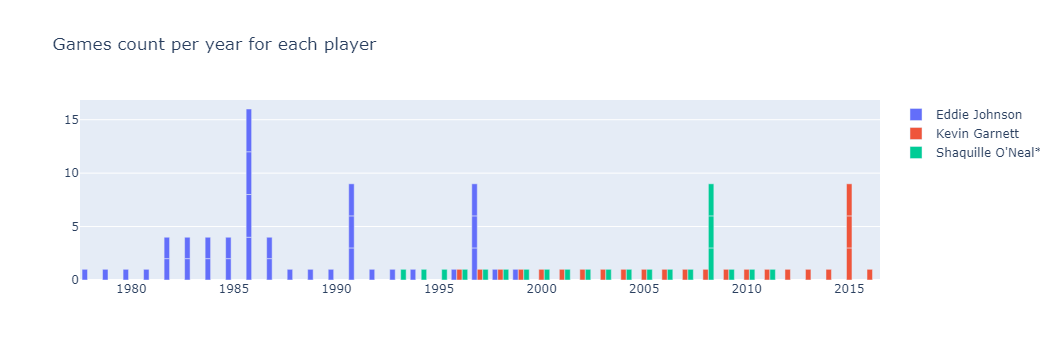

In [38]:
data3 = []
for player, group in featured_df_seasons_stats.groupby(['Player']):
    data3.append(go.Bar(
        x=group['Year'],
        y=group['Player_game_count_per_year'],
        name=player
    ))

layout3 = {'title': 'Games count per year for each player'}

fig3 = go.Figure(data=data3, layout=layout3)

iplot(fig3, show_link=False)

We do it in another way (much more concise):


In [39]:
df_seasons_stats_tr = cleared_df_seasons_stats.copy()
df_seasons_stats_tr['Player_game_count_per_year'] = cleared_df_seasons_stats.groupby(['Year', 'Player'])['Player'].transform('count')
# df_seasons_stats_tr.loc[(df_seasons_stats_tr['Player'] == 'Eddie Johnson') & (df_seasons_stats_tr['Year'] == 1986.0)]

In [40]:
df_seasons_stats_tr = df_seasons_stats_tr[['Player', 'Year', 'Player_game_count_per_year']]
df_seasons_stats_tr = df_seasons_stats_tr.loc[df_seasons_stats_tr['Player'].isin(top_3_PER_players.index.values)]
df_seasons_stats_tr = df_seasons_stats_tr.drop_duplicates(keep='last')
# df_seasons_stats_tr.sort_values(by = ['Player', 'Year'])

TODO: wrap iplot in a function


C:\Users\Administrator\AppData\Local\Temp\ipykernel_24660\170572216.py:2: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



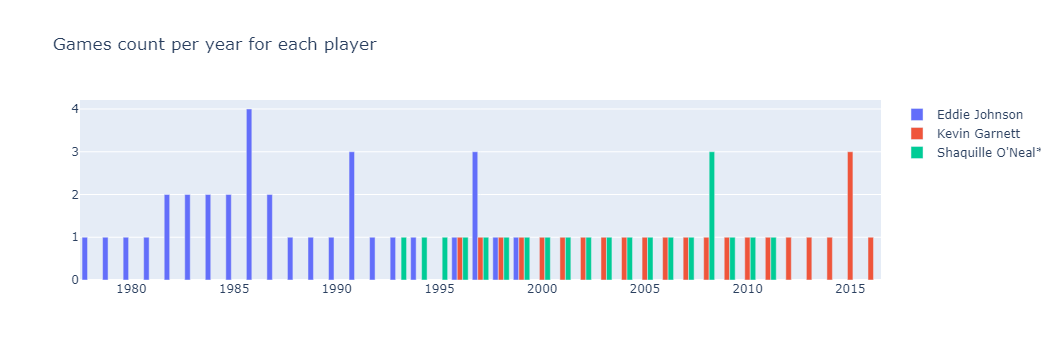

In [41]:
data4 = []
for player, group in df_seasons_stats_tr.groupby(['Player']):
    data4.append(
        go.Bar(
                x = group['Year'],
                y = group['Player_game_count_per_year'],
                name = player
            )
    )

iplot(
    go.Figure(
        data = data4, 
        layout = {'title': 'Games count per year for each player'}
    ), 
    show_link = False
)

In [42]:
df_seasons_stats_PTS = cleared_df_seasons_stats.copy()
df_seasons_stats_PTS = df_seasons_stats_PTS[['Player', 'Year', 'PTS']]
df_seasons_stats_PTS = df_seasons_stats_PTS.loc[df_seasons_stats_PTS['Player'].isin(top_3_PER_players.index.values)]
#df_seasons_stats_PTS = df_seasons_stats_PTS.drop_duplicates(keep='last')
#df_seasons_stats_PTS.sort_values(by = ['Player', 'Year'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24660\1100118822.py:2: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



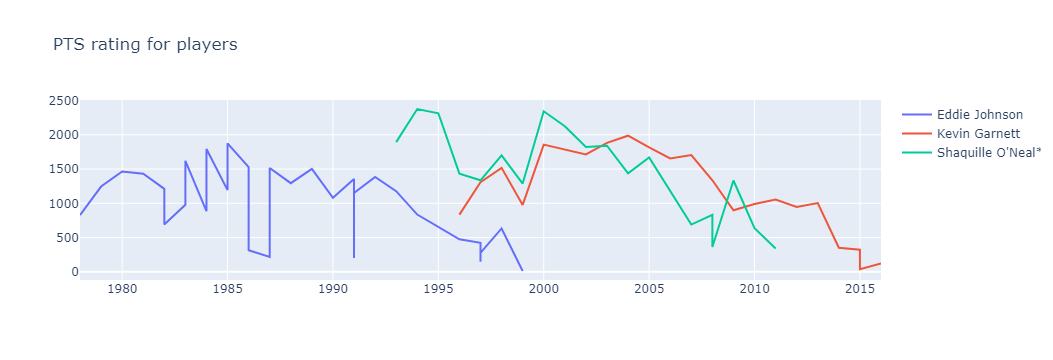

In [43]:
data5 = []
for player, group in df_seasons_stats_PTS.groupby(['Player']):
    data5.append(
        go.Scatter(
                x = group['Year'],
                y = group['PTS'],
                name = player
            )
    )

iplot(
    go.Figure(
        data = data5, 
        layout = {'title': 'PTS rating for players'}
    ), 
    show_link = False
)

As we can see, the years in the Year column are repeated, which apparently means that the player could have a PTS value for each of the games in the season.


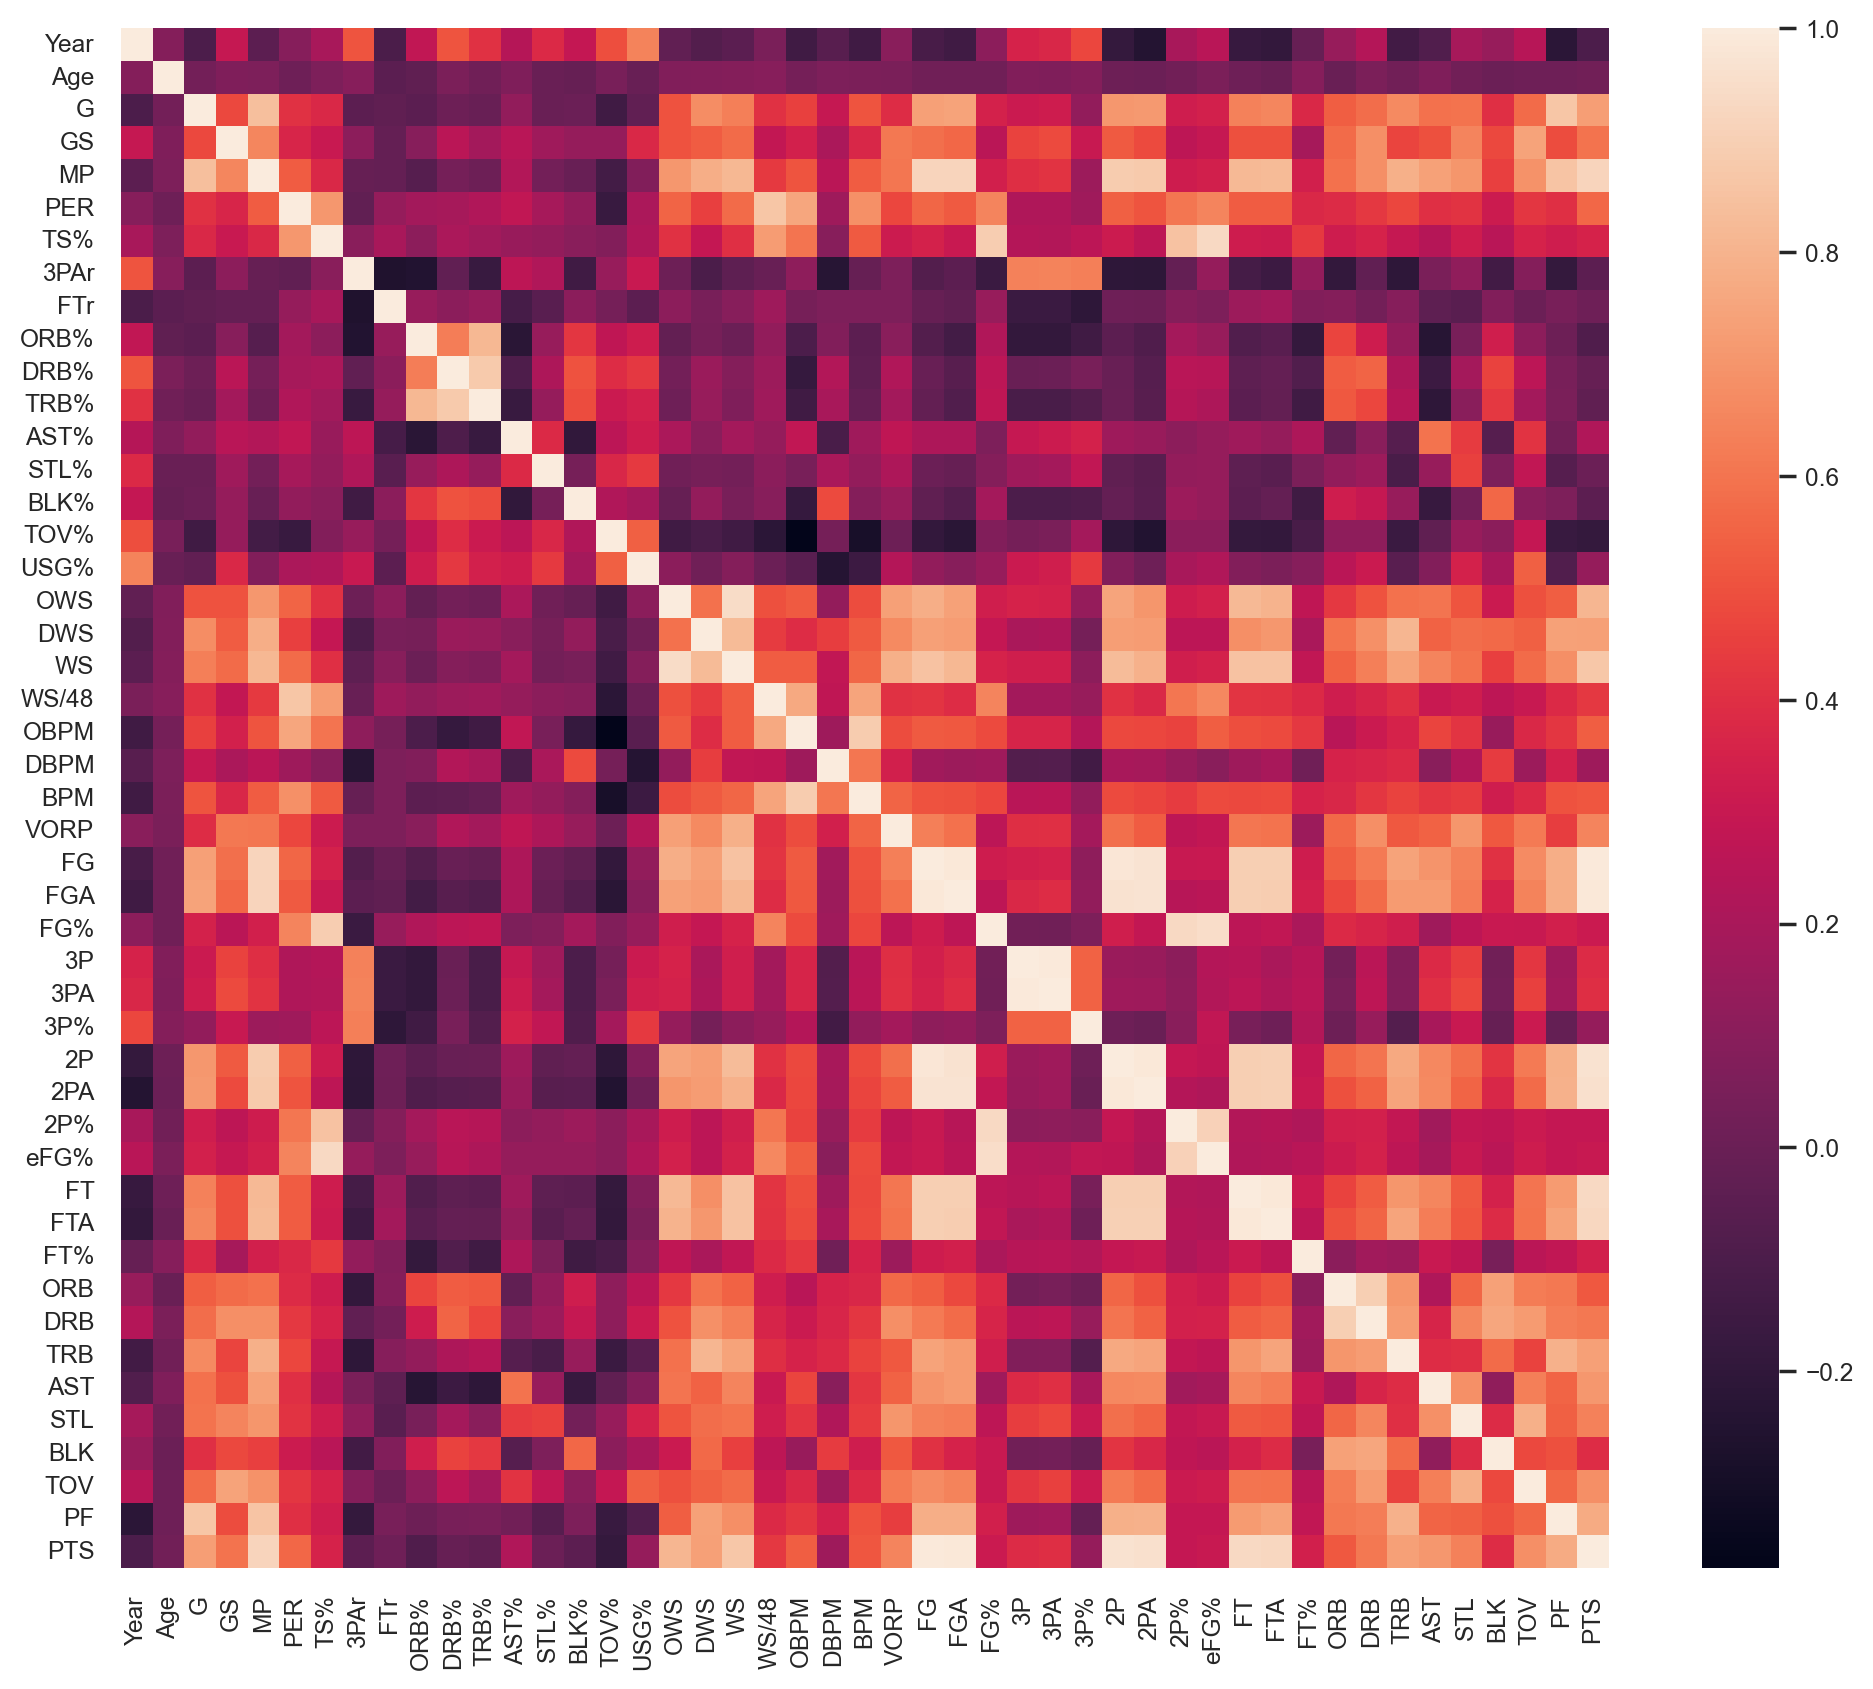

In [44]:
corr_matrix = cleared_df_seasons_stats.drop(['Player', 'Pos', 'Tm'], axis=1).corr()
sns.set(font_scale=0.8)
f = figure(figsize = (12, 10), dpi = 200)
corr_matrix_figure = sns.heatmap(corr_matrix)
plt.savefig('cleared_df_seasons_stats_corr.png')

On the correlation map, we see a strong correlation between the following columns:  
FGA - FG;  
3PA - 3P;  
2PA - 2P;  
FTA-FT;  
2P, 2PA - FG;  
2P, 2PA - FGA;


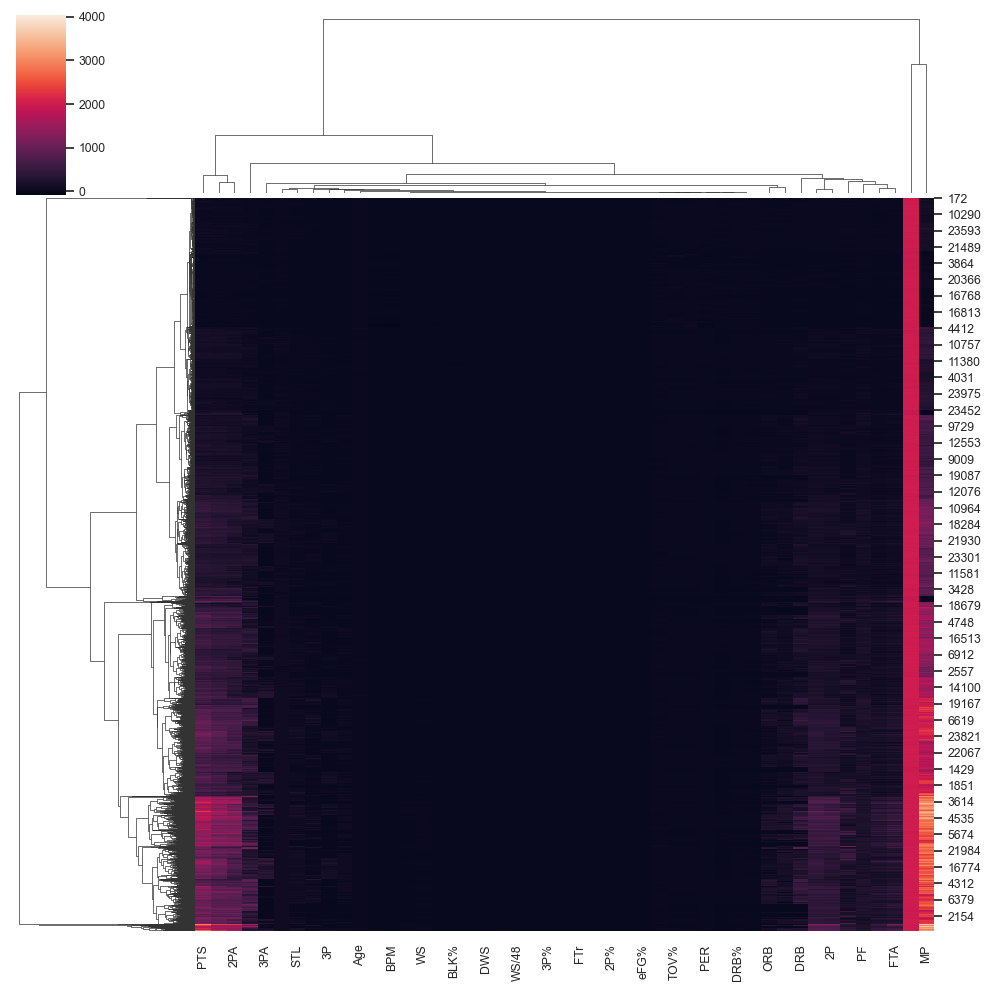

In [46]:
cluster_matrix = cleared_df_seasons_stats.drop(['Player', 'Pos', 'Tm'], axis=1)
#print(cluster_matrix.shape)
sns.clustermap(cluster_matrix)

TODO: analyze chart. Adjust if needed.
